<a href="https://colab.research.google.com/github/LuizGustavo8/7DaysOfCode/blob/main/7DaysOfCode.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Dia 1 - Explorar dados de empréstimos dos acervos do sistema de bibliotecas da UFRN.

Desafio: Dados baixados? Ok, mas são diversas tabelas diferentes e isso dificulta o trabalho. Portanto, o seu primeiro passo é **unificar** em um único Dataframe todos os dados pertinentes para a análise.

Comece pelos **empréstimos** e você terá os dados das transações. Depois, **mescle** com os dados do **acervo**, para que você possa entender, por exemplo, de qual biblioteca era o material emprestado ou a qual tema ele se referia. Elas se relacionam pela coluna de **código de barras** de cada material.

Lembre-se que é muito comum receber **dados nulos** ou **duplicados**, por isso não deixe de fazer a **limpeza**.

Importando bibliotecas:

In [1]:
import pandas as pd

In [2]:
import glob

Importando os dados diretamente do Github para o notebook:

In [3]:
!git clone https://github.com/FranciscoFoz/7_Days_of_Code_Alura-Python-Pandas.git

Cloning into '7_Days_of_Code_Alura-Python-Pandas'...
remote: Enumerating objects: 282, done.
remote: Counting objects: 100% (62/62), done.
remote: Compressing objects: 100% (62/62), done.
remote: Total 282 (delta 29), reused 0 (delta 0), pack-reused 220
Receiving objects: 100% (282/282), 82.88 MiB | 9.32 MiB/s, done.
Resolving deltas: 100% (102/102), done.
Updating files: 100% (33/33), done.


Esquema para ler os múltiplos arquivos csv, definindo o data frame para os empréstimos:

In [4]:
path = f'/content/7_Days_of_Code_Alura-Python-Pandas/Dia_1-Importando_dados/Datasets/dados_emprestimos/'

In [5]:
all_files = glob.glob(path + "*.csv")

In [6]:
all_files

['/content/7_Days_of_Code_Alura-Python-Pandas/Dia_1-Importando_dados/Datasets/dados_emprestimos/emprestimos-20111.csv',
 '/content/7_Days_of_Code_Alura-Python-Pandas/Dia_1-Importando_dados/Datasets/dados_emprestimos/emprestimos-20171.csv',
 '/content/7_Days_of_Code_Alura-Python-Pandas/Dia_1-Importando_dados/Datasets/dados_emprestimos/emprestimos-20181.csv',
 '/content/7_Days_of_Code_Alura-Python-Pandas/Dia_1-Importando_dados/Datasets/dados_emprestimos/emprestimos-20122.csv',
 '/content/7_Days_of_Code_Alura-Python-Pandas/Dia_1-Importando_dados/Datasets/dados_emprestimos/emprestimos-20182.csv',
 '/content/7_Days_of_Code_Alura-Python-Pandas/Dia_1-Importando_dados/Datasets/dados_emprestimos/emprestimos-20191.csv',
 '/content/7_Days_of_Code_Alura-Python-Pandas/Dia_1-Importando_dados/Datasets/dados_emprestimos/emprestimos-20201.csv',
 '/content/7_Days_of_Code_Alura-Python-Pandas/Dia_1-Importando_dados/Datasets/dados_emprestimos/emprestimos-20151.csv',
 '/content/7_Days_of_Code_Alura-Python-P

In [7]:
li = []

In [8]:
for filename in all_files:
        df = pd.read_csv(filename)
        li.append(df)

df_emprestimos = pd.concat(li, axis=0, ignore_index=True)

In [9]:
df_emprestimos.head()

,id_emprestimo,codigo_barras,data_renovacao,data_emprestimo,data_devolucao,matricula_ou_siape,tipo_vinculo_usuario
0,920246,Y019450,NaN,2011/01/03 08:08:18.986000000,2011/01/14 08:36:10.000000000,2.010071e+09,ALUNO DE GRADUAÇÃO
1,920247,Y020420,NaN,2011/01/03 08:08:19.077000000,2011/01/14 08:36:27.000000000,2.010071e+09,ALUNO DE GRADUAÇÃO
2,920248,S020100,2011/01/17 23:31:17.992000000,2011/01/03 08:48:20.360000000,2011/01/18 12:37:26.000000000,1.636623e+06,SERVIDOR TÉCNICO-ADMINISTRATIVO
3,920249,S024844,2011/01/17 23:31:17.944000000,2011/01/03 08:48:20.433000000,2011/02/07 17:46:44.000000000,1.636623e+06,SERVIDOR TÉCNICO-ADMINISTRATIVO
4,920250,S026026,2011/01/17 23:31:17.915000000,2011/01/03 08:48:20.483000000,2011/01/18 12:37:43.000000000,1.636623e+06,SERVIDOR TÉCNICO-ADMINISTRATIVO


Importando os dados dos exemplares, arquivo parquet:

In [10]:
parquet_path = '/content/7_Days_of_Code_Alura-Python-Pandas/Dia_1-Importando_dados/Datasets/dados_exemplares.parquet'

parquet_data = pd.read_parquet(parquet_path)

df_exemplares = parquet_data

In [11]:
df_exemplares.head()

,id_exemplar,codigo_barras,colecao,biblioteca,status_material,localizacao,registro_sistema
index,,,,,,,
0,5,L000003,Acervo Circulante,Biblioteca Central Zila Mamede,REGULAR,694,1
1,4,L000002,Acervo Circulante,Biblioteca Central Zila Mamede,REGULAR,688,1
2,3,L000001,Acervo Circulante,Biblioteca Central Zila Mamede,ESPECIAL,638,1
3,7,L000114,Acervo Circulante,Biblioteca Central Zila Mamede,REGULAR,616,5
5,10,L000041,Acervo Circulante,Biblioteca Central Zila Mamede,ESPECIAL,657,15


## Análisando os dados

### Empréstimos

In [12]:
df_emprestimos.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2258018 entries, 0 to 2258017
Data columns (total 7 columns):
 #   Column                Dtype  
---  ------                -----  
 0   id_emprestimo         int64  
 1   codigo_barras         object 
 2   data_renovacao        object 
 3   data_emprestimo       object 
 4   data_devolucao        object 
 5   matricula_ou_siape    float64
 6   tipo_vinculo_usuario  object 
dtypes: float64(1), int64(1), object(5)
memory usage: 120.6+ MB


In [13]:
df_emprestimos.describe(include = object)

,codigo_barras,data_renovacao,data_emprestimo,data_devolucao,tipo_vinculo_usuario
count,2258018,972298,2258018,2251547,2258018
unique,276757,970947,2257902,2229749,8
top,2010091988,2010/11/03 00:00:00.000000000,2010/01/04 09:58:46.522000000,2012/07/02 12:35:12.024000000,ALUNO DE GRADUAÇÃO
freq,196,30,7,12,1769197


Convertendo ID e Matrícula em string e os campos de data para datetime:

In [14]:
df_emprestimos['matricula_ou_siape'] = df_emprestimos['matricula_ou_siape'].astype(str).str.rstrip('.0')
df_emprestimos['id_emprestimo'] = df_emprestimos['id_emprestimo'].astype(str)
df_emprestimos[['data_emprestimo', 'data_renovacao', 'data_devolucao']] = df_emprestimos[['data_emprestimo', 'data_renovacao', 'data_devolucao']].apply(pd.to_datetime)

In [15]:
df_emprestimos.value_counts()

id_emprestimo  codigo_barras  data_renovacao           data_emprestimo          data_devolucao           matricula_ou_siape  tipo_vinculo_usuario  
709705         2009032168     2010-01-17 18:56:43.909  2010-01-04 09:58:46.549  2010-01-20 13:14:34.464  200800989           ALUNO DE GRADUAÇÃO        7
709704         2006021442     2010-01-17 18:56:43.923  2010-01-04 09:58:46.522  2010-02-01 13:59:02.528  200800989           ALUNO DE GRADUAÇÃO        7
709698         2009047725     2010-01-18 14:44:41.163  2010-01-04 09:21:19.099  2010-02-02 12:02:38.444  2009046838          ALUNO DE GRADUAÇÃO        3
2461099        2012008348     2016-06-27 20:35:46.855  2016-06-14 11:20:33.254  2016-07-11 14:37:29.000  2015021539          ALUNO DE GRADUAÇÃO        2
2351386        2015005192     2016-01-16 07:41:19.537  2016-01-02 10:02:44.507  2016-01-30 07:52:07.000  2015315556          ALUNO MÉDIO/TÉCNICO       2
                                                                                       

Há alguns valores duplicados, vamos remove-los:

In [16]:
df_emprestimos = df_emprestimos.drop_duplicates()

In [17]:
df_emprestimos.value_counts()

id_emprestimo  codigo_barras  data_renovacao           data_emprestimo          data_devolucao       matricula_ou_siape  tipo_vinculo_usuario  
10000000       2015036976     2017-08-29 20:19:14.111  2017-08-16 16:21:35.442  2017-09-27 15:04:18  2012937973          ALUNO DE GRADUAÇÃO        1
2651525        2014077389     2018-05-17 18:54:15.716  2018-05-02 13:43:52.357  2018-05-29 14:16:35  2014078143          ALUNO DE GRADUAÇÃO        1
2651494        2010033801     2018-05-16 09:59:44.446  2018-05-02 13:17:16.834  2018-05-24 13:43:42  2014070548          ALUNO DE GRADUAÇÃO        1
2651495        2011001533     2018-05-16 09:59:44.414  2018-05-02 13:17:16.886  2018-05-24 13:43:45  2014070548          ALUNO DE GRADUAÇÃO        1
2651496        2014007624     2018-05-16 06:05:41.939  2018-05-02 13:17:21.503  2018-06-01 12:48:32  2015075781          ALUNO DE GRADUAÇÃO        1
                                                                                                               

In [18]:
df_emprestimos.isnull().sum()

id_emprestimo                 0
codigo_barras                 0
data_renovacao          1285709
data_emprestimo               0
data_devolucao             6471
matricula_ou_siape            0
tipo_vinculo_usuario          0
dtype: int64

Podemos verificar a existência de valores nulos, mas por serem referentes a data de renovação e devolução, os campos em questão podem fazer referência a livros que foram devolvidos sem renovação ou que nunca foram devolvidos, portanto é pertinente manter esses dados.

### Exemplares

In [19]:
df_exemplares.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 546237 entries, 0 to 568584
Data columns (total 7 columns):
 #   Column            Non-Null Count   Dtype 
---  ------            --------------   ----- 
 0   id_exemplar       546237 non-null  int64 
 1   codigo_barras     546237 non-null  object
 2   colecao           546237 non-null  object
 3   biblioteca        546237 non-null  object
 4   status_material   546237 non-null  object
 5   localizacao       546237 non-null  int64 
 6   registro_sistema  546237 non-null  int64 
dtypes: int64(3), object(4)
memory usage: 33.3+ MB


Convertendo ID e Registro em string:

In [20]:
df_exemplares[['id_exemplar', 'registro_sistema']] = df_exemplares[['id_exemplar', 'registro_sistema']].astype(str)

In [21]:
df_exemplares.head()

,id_exemplar,codigo_barras,colecao,biblioteca,status_material,localizacao,registro_sistema
index,,,,,,,
0,5,L000003,Acervo Circulante,Biblioteca Central Zila Mamede,REGULAR,694,1
1,4,L000002,Acervo Circulante,Biblioteca Central Zila Mamede,REGULAR,688,1
2,3,L000001,Acervo Circulante,Biblioteca Central Zila Mamede,ESPECIAL,638,1
3,7,L000114,Acervo Circulante,Biblioteca Central Zila Mamede,REGULAR,616,5
5,10,L000041,Acervo Circulante,Biblioteca Central Zila Mamede,ESPECIAL,657,15


In [22]:
df_exemplares.value_counts()

id_exemplar  codigo_barras  colecao            biblioteca                                                                                status_material  localizacao  registro_sistema
10           L000041        Acervo Circulante  Biblioteca Central Zila Mamede                                                            ESPECIAL         657          15                  1
254150       2008039472     Acervo Circulante  Biblioteca Central Zila Mamede                                                            REGULAR          645          108478              1
254163       2008045487     Dissertações       Biblioteca Setorial Prof. Francisco Gurgel De Azevedo - Instituto Química - IQ            ESPECIAL         682          14666               1
254162       2008045103     Acervo Circulante  Biblioteca Central Zila Mamede                                                            REGULAR          660          108488              1
254161       2008021587     Acervo Circulante  Biblioteca Ce

In [23]:
df_exemplares.isnull().sum()

id_exemplar         0
codigo_barras       0
colecao             0
biblioteca          0
status_material     0
localizacao         0
registro_sistema    0
dtype: int64

Não há duplicados e não há valores nulos.

Unindo os DataFrames:

In [24]:
df_biblioteca = df_emprestimos.merge(df_exemplares)

In [25]:
df_biblioteca.head()

,id_emprestimo,codigo_barras,data_renovacao,data_emprestimo,data_devolucao,matricula_ou_siape,tipo_vinculo_usuario,id_exemplar,colecao,biblioteca,status_material,localizacao,registro_sistema
0,920248,S020100,2011-01-17 23:31:17.992,2011-01-03 08:48:20.360,2011-01-18 12:37:26,1636623,SERVIDOR TÉCNICO-ADMINISTRATIVO,141340,Acervo Circulante,Biblioteca Setorial do Centro Ciências da Saúd...,NÃO CIRCULA,626,49650
1,1014940,S020100,NaT,2011-06-08 13:49:07.443,2011-06-13 10:15:48,200632647,ALUNO DE GRADUAÇÃO,141340,Acervo Circulante,Biblioteca Setorial do Centro Ciências da Saúd...,NÃO CIRCULA,626,49650
2,1039742,S020100,NaT,2011-08-04 09:57:46.804,2011-08-25 10:53:19,175436,DOCENTE,141340,Acervo Circulante,Biblioteca Setorial do Centro Ciências da Saúd...,NÃO CIRCULA,626,49650
3,920249,S024844,2011-01-17 23:31:17.944,2011-01-03 08:48:20.433,2011-02-07 17:46:44,1636623,SERVIDOR TÉCNICO-ADMINISTRATIVO,157040,Acervo Circulante,Biblioteca Setorial do Centro Ciências da Saúd...,REGULAR,683,58341
4,940666,S024844,2011-03-18 22:31:52.840,2011-03-03 15:24:58.691,2011-03-29 17:47:20,1636623,SERVIDOR TÉCNICO-ADMINISTRATIVO,157040,Acervo Circulante,Biblioteca Setorial do Centro Ciências da Saúd...,REGULAR,683,58341


# Dia 2 - Classificação CDU

Desafio: Você deve ter visto que tem uma coluna identificada como “localização” e diversos números nela, mas você sabe o que significam estes números?


"Os itens do acervo em uma biblioteca são organizados por um sistema de classificação de acordo com o respectivo tema. Existem diversos sistemas, mas este conjunto está de acordo com a CDU - Classificação Decimal Universal. Esta classificação é decimal, pois varia de acordo com a classe de cada assunto:


000 a 099: Generalidades. Ciência e conhecimento.
100 a 199: Filosofia e psicologia.
200 a 299: Religião.
300 a 399: Ciências sociais.
400 a 499: Classe vaga. Provisoriamente não ocupada.
500 a 599: Matemática e ciências naturais.
600 a 699: Ciências aplicadas.
700 a 799: Belas artes.
800 a 899: Linguagem. Língua. Linguística.
900 a 999: Geografia. Biografia. História."

Portanto, se um material tiver um código de localização 720, ele está dentro da classe geral de “Belas Artes”; ou se tiver um código 028, estará dentro da classe geral de “Generalidades. Ciência e conhecimento”.

Criando uma nova coluna com os valores da localização, para refletir a respectiva classe geral na CDU.

In [26]:
df_biblioteca.loc[(df_biblioteca['localizacao'] >= 0) & (df_biblioteca['localizacao'] <= 99), 'assunto_livro'] = 'Generalidades_ciencia_e_conhecimento'
df_biblioteca.loc[(df_biblioteca['localizacao'] >= 100) & (df_biblioteca['localizacao'] <= 199), 'assunto_livro'] = 'Filosofia_psicologia'
df_biblioteca.loc[(df_biblioteca['localizacao'] >= 200) & (df_biblioteca['localizacao'] <= 299), 'assunto_livro'] = 'Religiao'
df_biblioteca.loc[(df_biblioteca['localizacao'] >= 300) & (df_biblioteca['localizacao'] <= 399), 'assunto_livro'] = 'Ciencias_sociais'
df_biblioteca.loc[(df_biblioteca['localizacao'] >= 400) & (df_biblioteca['localizacao'] <= 499), 'assunto_livro'] = 'Classe_vaga'
df_biblioteca.loc[(df_biblioteca['localizacao'] >= 500) & (df_biblioteca['localizacao'] <= 599), 'assunto_livro'] = 'Matematica_ciencias_naturais'
df_biblioteca.loc[(df_biblioteca['localizacao'] >= 600) & (df_biblioteca['localizacao'] <= 699), 'assunto_livro'] = 'Ciencias_aplicadas'
df_biblioteca.loc[(df_biblioteca['localizacao'] >= 700) & (df_biblioteca['localizacao'] <= 799), 'assunto_livro'] = 'Belas_artes'
df_biblioteca.loc[(df_biblioteca['localizacao'] >= 800) & (df_biblioteca['localizacao'] <= 899), 'assunto_livro'] = 'Linguagem_lingua_linguistica'
df_biblioteca.loc[(df_biblioteca['localizacao'] >= 900) & (df_biblioteca['localizacao'] <= 999), 'assunto_livro'] = 'Geografia_biografia_historia'
df_biblioteca.loc[(df_biblioteca['localizacao'].isna()), 'assunto_livro'] = 'Nao_catalogado'


Você precisará ainda excluir alguns dados e modificar outros.  

A coluna "registro_sistema", por exemplo, não está fazendo sentido para essa análise, por isso você pode exclui-la.

In [27]:
df_biblioteca = df_biblioteca.drop(['registro_sistema'], axis=1)

In [28]:
df_biblioteca.head()

,id_emprestimo,codigo_barras,data_renovacao,data_emprestimo,data_devolucao,matricula_ou_siape,tipo_vinculo_usuario,id_exemplar,colecao,biblioteca,status_material,localizacao,assunto_livro
0,920248,S020100,2011-01-17 23:31:17.992,2011-01-03 08:48:20.360,2011-01-18 12:37:26,1636623,SERVIDOR TÉCNICO-ADMINISTRATIVO,141340,Acervo Circulante,Biblioteca Setorial do Centro Ciências da Saúd...,NÃO CIRCULA,626,Ciencias_aplicadas
1,1014940,S020100,NaT,2011-06-08 13:49:07.443,2011-06-13 10:15:48,200632647,ALUNO DE GRADUAÇÃO,141340,Acervo Circulante,Biblioteca Setorial do Centro Ciências da Saúd...,NÃO CIRCULA,626,Ciencias_aplicadas
2,1039742,S020100,NaT,2011-08-04 09:57:46.804,2011-08-25 10:53:19,175436,DOCENTE,141340,Acervo Circulante,Biblioteca Setorial do Centro Ciências da Saúd...,NÃO CIRCULA,626,Ciencias_aplicadas
3,920249,S024844,2011-01-17 23:31:17.944,2011-01-03 08:48:20.433,2011-02-07 17:46:44,1636623,SERVIDOR TÉCNICO-ADMINISTRATIVO,157040,Acervo Circulante,Biblioteca Setorial do Centro Ciências da Saúd...,REGULAR,683,Ciencias_aplicadas
4,940666,S024844,2011-03-18 22:31:52.840,2011-03-03 15:24:58.691,2011-03-29 17:47:20,1636623,SERVIDOR TÉCNICO-ADMINISTRATIVO,157040,Acervo Circulante,Biblioteca Setorial do Centro Ciências da Saúd...,REGULAR,683,Ciencias_aplicadas


Não será necessário converter "matricula_ou_siape" em string pois já fizemos isso na filtrando os dados no dia anterior

# Dia 3 - Análise Anual, Mensal e Diária

Para isso, verifique qual é a quantidade total de exemplares emprestados por cada ano e plote um gráfico de linhas.

Depois, faça uma análise em relação à visualização gerada.

Atente-se para a quantidade de exemplares emprestados, e não de empréstimos realizados.

A diretoria também gostaria de gerenciar melhor os recursos humanos da biblioteca de acordo com a demanda de trabalho existente. Por exemplo:


gerenciar a programação de férias dos colaboradores de acordo com os meses de menor demanda;
programar atividades que não sejam de atendimento ao usuário para períodos específicos de menor demanda.

Há uma suspeita interna de que os meses com maior número de exemplares emprestados sejam março e setembro, mas não foi realizada uma análise real sobre isso.

Portanto, gere uma tabela com a quantidade total de exemplares emprestados por mês e descubra quais meses são os que possuem a maior quantidade de empréstimos realizados. Plote um gráfico de linhas.

Traga suas análises em relação a quais meses poderiam ser as melhores opções.

Além do gerenciamento anual das atividades, a diretoria também necessita que seja planejada uma programação diária das atividades. Por este motivo, verifique quais foram os horários com maior quantidade de empréstimos ao longo de um dia inteiro.

Plote um gráfico de barras e analise quais seriam os melhores horários para alocar as demais atividades que não sejam de atendimento ao usuário.

In [29]:
import seaborn as sns
import matplotlib.ticker as ticker
import matplotlib.pyplot as plt

In [30]:
emprestimos_data = pd.DataFrame(df_biblioteca['data_emprestimo'].value_counts()).reset_index()
emprestimos_data.columns = ['data','quantidade']
emprestimos_data['data'] = pd.to_datetime(emprestimos_data['data'])
emprestimos_data

,data,quantidade
0,2014-05-12 09:56:18.787,3
1,2015-05-05 20:37:19.551,3
2,2017-11-06 19:52:32.782,3
3,2014-07-14 15:35:51.822,3
4,2018-02-22 10:45:11.523,3
...,...,...
2068686,2012-10-24 17:18:37.700,1
2068687,2012-09-14 10:47:01.743,1
2068688,2012-08-07 10:02:33.951,1
2068689,2018-02-20 18:15:09.686,1


In [31]:
emprestimos_por_ano = emprestimos_data.groupby(by=emprestimos_data.data.dt.year).sum()
emprestimos_por_ano.index.name = 'ano'
emprestimos_por_ano

<ipython-input-31-277080f42e31>:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  emprestimos_por_ano = emprestimos_data.groupby(by=emprestimos_data.data.dt.year).sum()


,quantidade
ano,
2010,161394
2011,196390
2012,221365
2013,234749
2014,219189
2015,213582
2016,215900
2017,218462
2018,194080


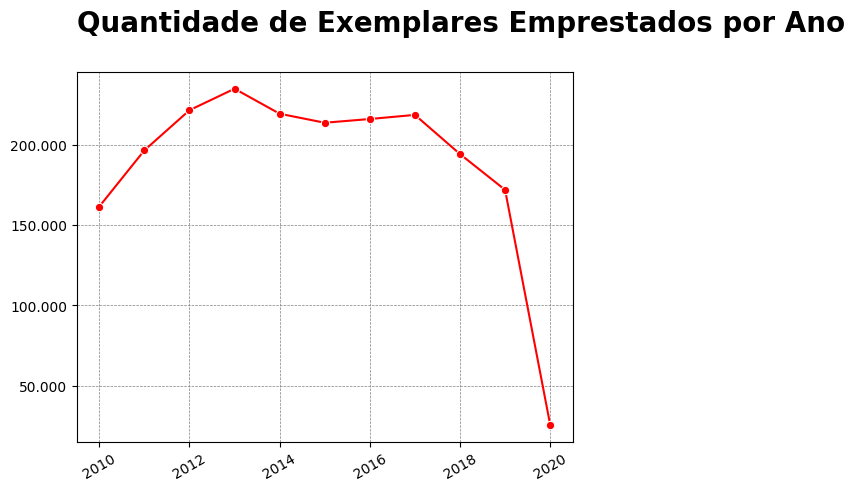

In [32]:
ax = sns.lineplot(data=emprestimos_por_ano,x='ano',y='quantidade', color='r', marker='o')
ax.set(xlabel=None,ylabel=None)
ax.tick_params(axis='x', rotation=30)
ax.yaxis.set_major_formatter(ticker.FuncFormatter(lambda x, p: format(int(x), ',').replace(',','.')))
ax.grid(True, which='both', linestyle='--', color='gray', linewidth=0.5)
ax.set_title('Quantidade de Exemplares Emprestados por Ano'+'\n',size=20,loc='left',weight='bold')

ax=ax

In [33]:
emprestimos_por_mes = emprestimos_data.groupby(by=emprestimos_data.data.dt.month).sum()
emprestimos_por_mes.index.name = 'mes'
emprestimos_por_mes

<ipython-input-33-e71e7e04c03f>:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  emprestimos_por_mes = emprestimos_data.groupby(by=emprestimos_data.data.dt.month).sum()


,quantidade
mes,
1,67514
2,210200
3,252185
4,208725
5,202530
6,138123
7,123790
8,232793
9,208234


In [34]:
dicionario_meses = {1:'Jan',2:'Fev',3:'Mar',4:'Abr',
                    5:'Mai',6:'Jun',7:'Jul',8:'Ago',
                    9:'Set',10:'Out',11:'Nov',12:'Dez'}

emprestimos_por_mes.index = emprestimos_por_mes.index.map(dicionario_meses)

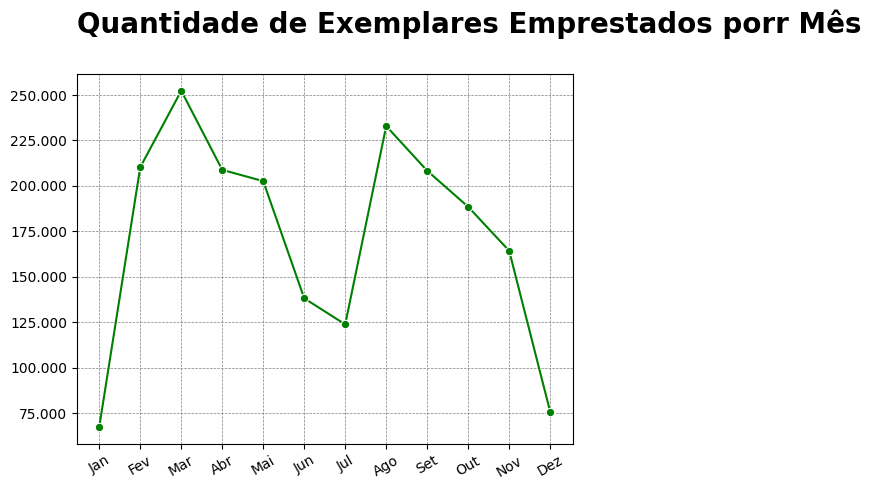

In [35]:
ax = sns.lineplot(data=emprestimos_por_mes,x='mes',y='quantidade', color='g', marker='o')
ax.set(xlabel=None,ylabel=None)
ax.tick_params(axis='x',rotation=30)
ax.yaxis.set_major_formatter(ticker.FuncFormatter(lambda x, p: format(int(x), ',').replace(',','.')))
ax.grid(True, which='both', linestyle='--', color='gray', linewidth=0.5)
ax.set_title("Quantidade de Exemplares Emprestados porr Mês"+"\n",size=20,loc='left',weight='bold')

ax=ax

In [36]:
emprestimos_data.data

0         2014-05-12 09:56:18.787
1         2015-05-05 20:37:19.551
2         2017-11-06 19:52:32.782
3         2014-07-14 15:35:51.822
4         2018-02-22 10:45:11.523
                    ...          
2068686   2012-10-24 17:18:37.700
2068687   2012-09-14 10:47:01.743
2068688   2012-08-07 10:02:33.951
2068689   2018-02-20 18:15:09.686
2068690   2012-06-28 18:52:52.994
Name: data, Length: 2068691, dtype: datetime64[ns]

In [37]:
emprestimos_por_hora = emprestimos_data.groupby(by=emprestimos_data.data.dt.hour).sum()
emprestimos_por_hora.index.name = 'horas'
emprestimos_por_hora = emprestimos_por_hora.reset_index()
emprestimos_por_hora

<ipython-input-37-0fdb6d8c8020>:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  emprestimos_por_hora = emprestimos_data.groupby(by=emprestimos_data.data.dt.hour).sum()


,horas,quantidade
0,0,17
1,6,14
2,7,18777
3,8,103416
4,9,131273
5,10,185839
6,11,180048
7,12,148754
8,13,126987
9,14,150876


In [38]:
emprestimos_por_hora = emprestimos_por_hora.sort_values(ascending=True,by='quantidade')

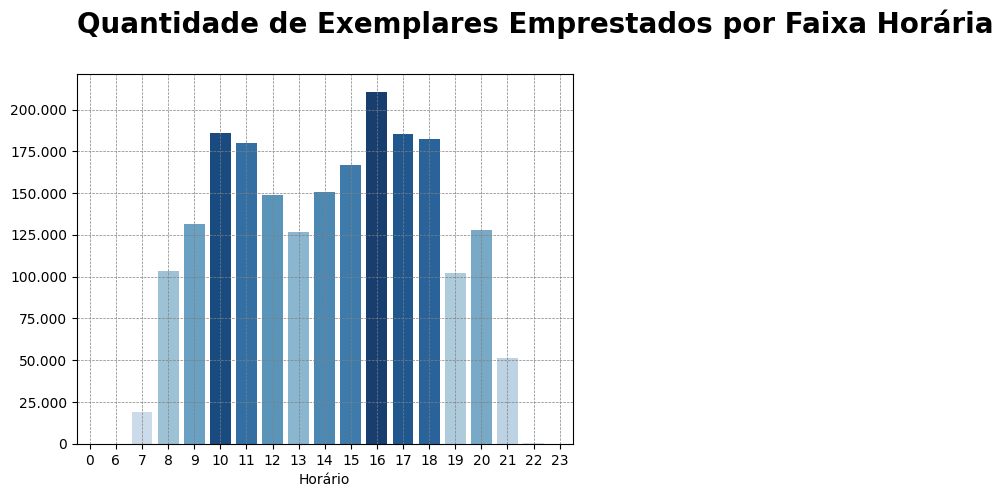

In [39]:
ax = sns.barplot(data=emprestimos_por_hora,y='quantidade',x='horas',
                 palette='Blues',hue='quantidade',dodge=False)
plt.legend([],[], frameon=False)

ax.set(xlabel='Horário',ylabel=None)
ax.yaxis.set_major_formatter(ticker.FuncFormatter(lambda x, p: format(int(x), ',').replace(',','.')))
ax.set_title("Quantidade de Exemplares Emprestados por Faixa Horária"+"\n",size=20,loc='left',weight='bold')
ax.grid(True, which='both', linestyle='--', color='gray', linewidth=0.5)
ax=ax

# Dia 4 - Classificação e Dispersões

Bom, um conjunto de dados é descrito pelas suas características que variam de acordo com cada um, por exemplo: peso, idade, quantidade de páginas, notas, nome da biblioteca, número de empréstimos, número de filhos, etc.

Elas podem ser classificadas em dois grandes grupos que se subdividem em mais dois outros grupos cada.

**Quantitativas:** são características numéricas que podemos enumerar:

Discreta: possuem apenas valores finitos enumeráveis. Exemplo: número de

1.   Discreta: possuem apenas valores finitos enumeráveis. Exemplo: número de empréstimos, número de filhos, número de páginas.
2.   Contínua: possuem valores dentro de um intervalo de números. Exemplo: altura, peso, notas.

**Categóricas (ou qualitativas):** são características não-numéricas para as quais podemos definir categorias.


1.   Nominal: possuem categorias não ordenadas naturalmente. Exemplo: nomes, cores, tema do livro.
2.   Ordinal: são categorias onde está implícito um tipo de ordenamento ou hierarquia. Exemplo: classe social, nível de escolaridade.





*   Como se distribuem os empréstimos de exemplares pelos tipos de vínculo dos usuários?

*   Quais coleções são mais emprestadas ?

*   Quais são as bibliotecas com mais ou menos quantidade de empréstimos ?

*   De quais temas da CDU são os exemplares emprestados ?

*   Gerar uma tabela de frequência e com o percentual para cada variável.



In [40]:
df_biblioteca['data_emprestimo'] = pd.to_datetime(df_biblioteca['data_emprestimo'])

In [41]:
df_biblioteca.tipo_vinculo_usuario.unique()

array(['SERVIDOR TÉCNICO-ADMINISTRATIVO', 'ALUNO DE GRADUAÇÃO', 'DOCENTE',
       'ALUNO DE PÓS-GRADUAÇÃO', 'DOCENTE EXTERNO', 'USUÁRIO EXTERNO',
       'ALUNO MÉDIO/TÉCNICO', 'OUTROS'], dtype=object)

In [42]:
df_biblioteca.colecao.unique()

array(['Acervo Circulante', 'Monografias', 'Dissertações', 'Multimeios',
       'Teses', 'Obras de Referência', 'Trabalho Acadêmico',
       'Publicações da UFRN', 'Publicações de Autores do RN', 'Eventos',
       'Coleção Mossoroense', 'Coleção Zila Mamede', 'Folhetos',
       'Literatura de Cordel', 'Necessidades Educacionais Específicas',
       'Obras Raras'], dtype=object)

In [43]:
df_biblioteca.biblioteca.unique()

array(['Biblioteca Setorial do Centro Ciências da Saúde - CCS',
       'Biblioteca Setorial Prof. Horácio Nicolas Solimo - \xad Engenharia Química - EQ - CT',
       'Biblioteca Central Zila Mamede',
       'Biblioteca Setorial do Centro de Ciências Humanas, Letras e Artes - CCHLA',
       'Biblioteca Setorial do Centro Ciências Sociais Aplicadas - CCSA',
       'Biblioteca Setorial Prof. Francisco Gurgel De Azevedo - Instituto Química - IQ',
       'Biblioteca Setorial Prof. Alberto Moreira Campos - \xadDepartamento de Odontologia',
       'Biblioteca Setorial Prof. Ronaldo Xavier de Arruda - CCET',
       'Biblioteca Setorial do Departamento de Artes - DEART',
       'Biblioteca Setorial Prof. Dr. Marcelo Bezerra de Melo Tinôco - DARQ - \xadCT',
       'Biblioteca Setorial Profª. Maria José Mamede Galvão - FELCS - Currais Novos',
       'Biblioteca Setorial Prof. Leopoldo Nelson - \xadCentro de Biociências - CB',
       'Biblioteca Setorial Moacyr de Góes - CE',
       'Biblioteca Se

In [44]:
df_biblioteca.assunto_livro.unique()

array(['Ciencias_aplicadas', 'Belas_artes', 'Ciencias_sociais',
       'Religiao', 'Geografia_biografia_historia',
       'Matematica_ciencias_naturais',
       'Generalidades_ciencia_e_conhecimento',
       'Linguagem_lingua_linguistica', 'Filosofia_psicologia'],
      dtype=object)

In [45]:
def tabela_frequencia(variavel): #Criar a função para gerar a tabela de frequência com percentuais

  dataframe = pd.DataFrame(df_biblioteca[variavel].value_counts())
  dataframe.columns = ['quantidade']
  dataframe['percentual'] = round((dataframe.quantidade / dataframe.quantidade.sum())*100,1)

  return dataframe

In [46]:
tabela_frequencia('tipo_vinculo_usuario')

,quantidade,percentual
ALUNO DE GRADUAÇÃO,1612324,77.8
ALUNO DE PÓS-GRADUAÇÃO,302541,14.6
DOCENTE,70981,3.4
SERVIDOR TÉCNICO-ADMINISTRATIVO,32184,1.6
ALUNO MÉDIO/TÉCNICO,28029,1.4
DOCENTE EXTERNO,23949,1.2
USUÁRIO EXTERNO,2509,0.1
OUTROS,5,0.0


In [47]:
tabela_frequencia('colecao')

,quantidade,percentual
Acervo Circulante,2053120,99.1
Multimeios,7954,0.4
Monografias,4021,0.2
Dissertações,2406,0.1
Obras de Referência,1954,0.1
Publicações de Autores do RN,866,0.0
Publicações da UFRN,764,0.0
Teses,714,0.0
Folhetos,271,0.0
Necessidades Educacionais Específicas,130,0.0


In [48]:
tabela_frequencia('biblioteca')

,quantidade,percentual
Biblioteca Central Zila Mamede,1426122,68.8
Biblioteca Setorial do Centro Ciências da Saúde - CCS,118614,5.7
Biblioteca Setorial da Faculdade de Ciências da Saúde do Trairi - FACISA - Santa Cruz,77609,3.7
Biblioteca Setorial Prof. Alberto Moreira Campos - ­Departamento de Odontologia,66447,3.2
Biblioteca Setorial Profª. Maria Lúcia da Costa Bezerra - ­CERES­ - Caicó,61478,3.0
Biblioteca Setorial Bertha Cruz Enders - ­Escola de Saúde da UFRN - ESUFRN,46040,2.2
"Biblioteca Setorial do Centro de Ciências Humanas, Letras e Artes - CCHLA",40744,2.0
Biblioteca Setorial Dr. Paulo Bezerra - EMCM/RN - Caicó,32097,1.5
Biblioteca Setorial Profª. Maria José Mamede Galvão - FELCS - Currais Novos,29089,1.4
Biblioteca Setorial Prof. Rodolfo Helinski - Escola Agrícola de Jundiaí - EAJ - Macaiba,27219,1.3


In [49]:
tabela_frequencia('assunto_livro')

,quantidade,percentual
Ciencias_aplicadas,1425473,68.8
Ciencias_sociais,369536,17.8
Matematica_ciencias_naturais,68744,3.3
Generalidades_ciencia_e_conhecimento,62521,3.0
Religiao,62295,3.0
Filosofia_psicologia,60563,2.9
Geografia_biografia_historia,7989,0.4
Belas_artes,7911,0.4
Linguagem_lingua_linguistica,7490,0.4


# Dia 5 - Análise com Boxplots

Você vai fazer dois recortes em seus dados para entender como eles se distribuíram ao decorrer desses anos e, desta forma, possa trazer inferências para levar à diretoria da biblioteca, a fim de que eles possam tomar decisões para o ano atual.

Para isso, você vai avaliar dentre os alunos de graduação e pós graduação a distribuição de empréstimos mensais por ano realizados entre 2010 e 2020 da coleção que tiver a maior frequência de empréstimos.

Plote um gráfico para cada tipo de usuário.
Tenha um boxplots para cada ano e analise o que ocorreu.

O que está ocorrendo ao decorrer do tempo? Houve algum ano ou anos em específico que te chamaram atenção para alguma diferença? Quais as maiores diferenças entre os empréstimos para os alunos de graduação e pós graduação?

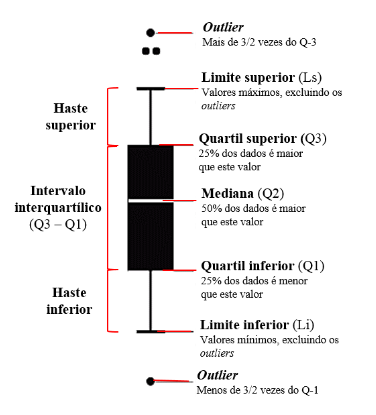

In [50]:
import matplotlib.pyplot as plt

In [51]:
graduacao = df_biblioteca.query('tipo_vinculo_usuario == "ALUNO DE GRADUAÇÃO"')
graduacao.colecao.value_counts()

Acervo Circulante                        1600155
Multimeios                                  4652
Monografias                                 3572
Dissertações                                1152
Obras de Referência                         1047
Publicações de Autores do RN                 595
Publicações da UFRN                          466
Teses                                        245
Folhetos                                     180
Trabalho Acadêmico                            81
Necessidades Educacionais Específicas         73
Eventos                                       57
Coleção Mossoroense                           17
Coleção Zila Mamede                           15
Literatura de Cordel                          11
Obras Raras                                    6
Name: colecao, dtype: int64

In [52]:
graduacao_acervo = graduacao.query('colecao == "Acervo Circulante"')
graduacao_acervo = pd.DataFrame(graduacao_acervo)
graduacao_acervo['data_emprestimo'] = pd.to_datetime(graduacao_acervo['data_emprestimo'])
graduacao_acervo['ano'] = graduacao_acervo['data_emprestimo'].dt.year
graduacao_acervo['mes'] = graduacao_acervo['data_emprestimo'].dt.month
graduacao_acervo = graduacao_acervo.loc[:,['ano','mes']]
graduacao_acervo = graduacao_acervo.value_counts().to_frame('quantidade').reset_index()
graduacao_acervo

,ano,mes,quantidade
0,2012,3,22797
1,2015,3,22483
2,2013,4,21853
3,2017,3,21735
4,2016,3,21692
...,...,...,...
118,2016,1,2670
119,2019,1,2276
120,2019,12,1980
121,2020,1,1781


In [53]:
def box_plot(dataset,x,y,titulo):

    sns.set_theme(style="whitegrid", palette="pastel",font_scale=1.3)
    plt.figure(figsize=(16,10))

    ax = sns.boxplot(y= y, x= x, data=dataset, color='#f54242')
    ax.yaxis.set_major_formatter(ticker.FuncFormatter(lambda x, p: format(int(x), ',').replace(',','.')))

    plt.ylim(0,max(dataset[y])*1.1)
    plt.xlabel(None)
    plt.ylabel(None)

    ax.set_title(titulo+"\n",size=20,loc='left',weight='bold')

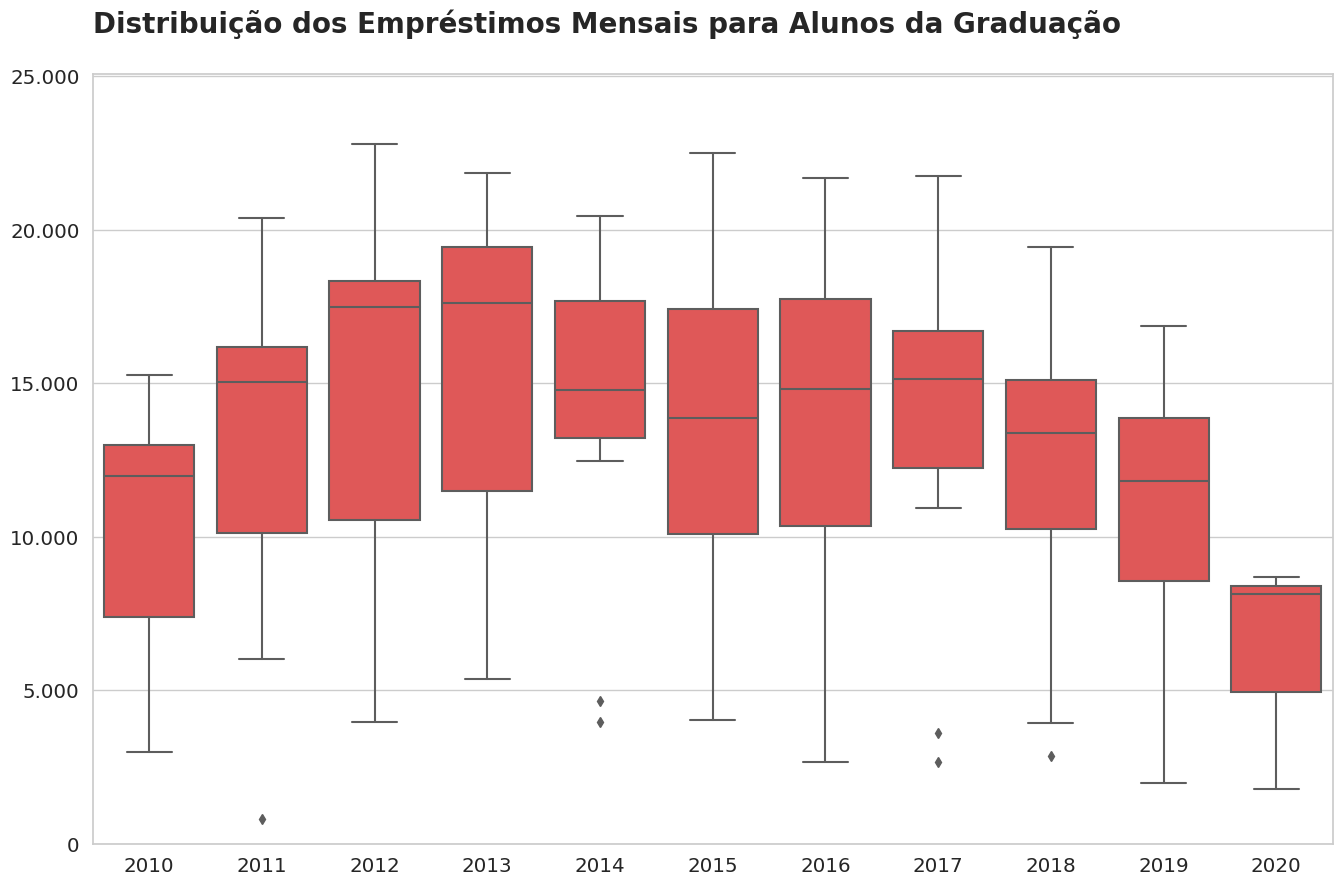

In [54]:
box_plot(graduacao_acervo,'ano','quantidade','Distribuição dos Empréstimos Mensais para Alunos da Graduação')

In [55]:
pos_graduacao = df_biblioteca.query('tipo_vinculo_usuario == "ALUNO DE PÓS-GRADUAÇÃO"')
pos_graduacao.colecao.value_counts()

Acervo Circulante                        299201
Dissertações                                934
Obras de Referência                         700
Multimeios                                  559
Teses                                       367
Monografias                                 278
Publicações de Autores do RN                204
Publicações da UFRN                         121
Folhetos                                     60
Necessidades Educacionais Específicas        30
Eventos                                      26
Coleção Mossoroense                          23
Trabalho Acadêmico                           23
Coleção Zila Mamede                          11
Literatura de Cordel                          4
Name: colecao, dtype: int64

In [56]:
pos_graduacao_acervo= pos_graduacao.query('colecao == "Acervo Circulante"')
pos_graduacao_acervo = pd.DataFrame(pos_graduacao_acervo)
pos_graduacao_acervo['data_emprestimo'] = pd.to_datetime(pos_graduacao_acervo['data_emprestimo'])
pos_graduacao_acervo['ano'] = pos_graduacao_acervo['data_emprestimo'].dt.year
pos_graduacao_acervo['mes'] = pos_graduacao_acervo['data_emprestimo'].dt.month
pos_graduacao_acervo = pos_graduacao_acervo.loc[:,['ano','mes']]
pos_graduacao_acervo = pos_graduacao_acervo.value_counts().to_frame('quantidade').reset_index()
pos_graduacao_acervo

,ano,mes,quantidade
0,2015,3,3927
1,2017,8,3837
2,2017,3,3722
3,2016,3,3711
4,2016,8,3662
...,...,...,...
119,2020,1,1143
120,2010,1,1105
121,2019,12,1069
122,2011,1,465


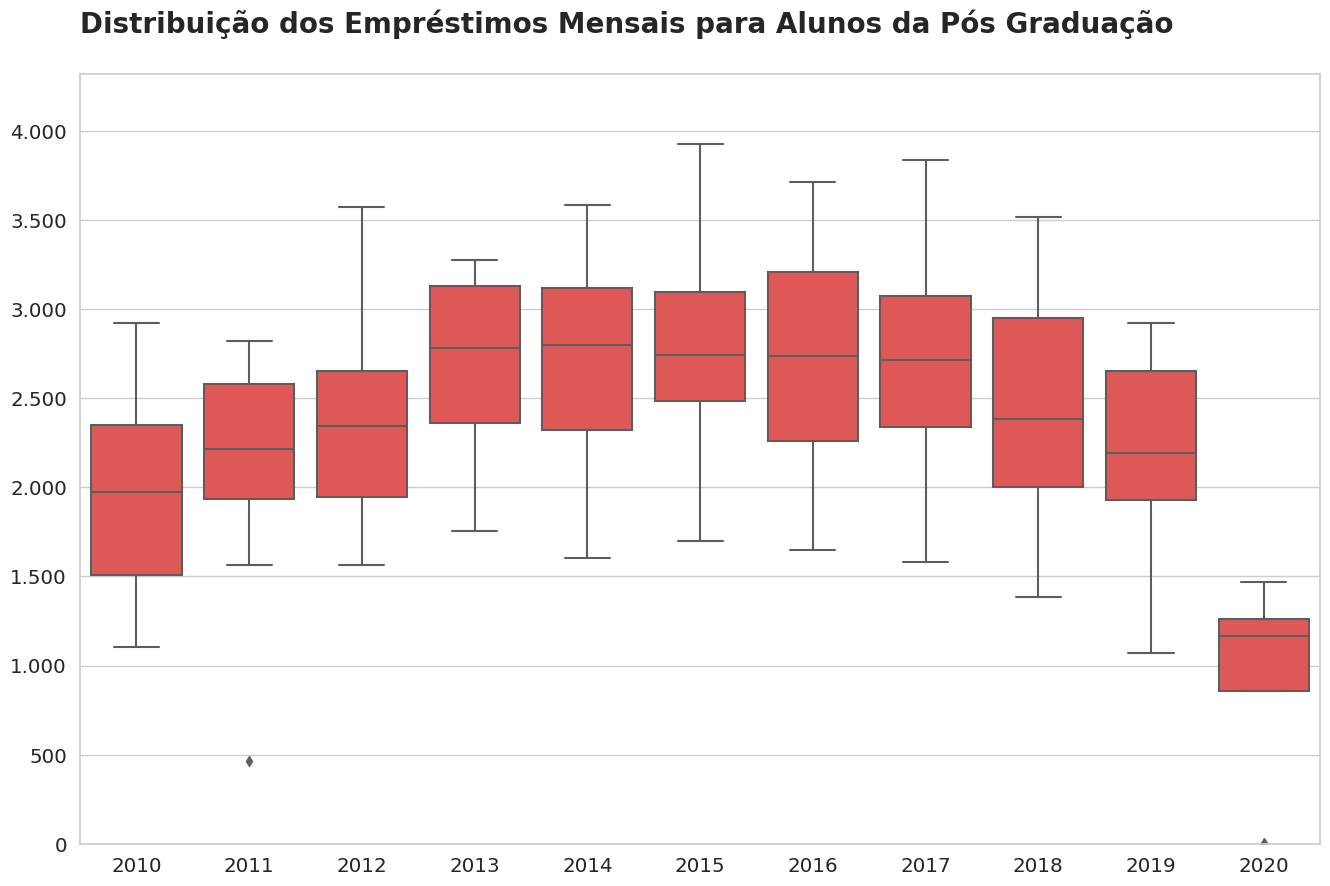

In [57]:
box_plot(pos_graduacao_acervo,'ano','quantidade','Distribuição dos Empréstimos Mensais para Alunos da Pós Graduação')

# Dia 6 - Novas métricas e Json

Você precisará de novas métricas em relação aos empréstimos, de acordo com os cursos.

Você precisará calcular a quantidade de empréstimos realizados entre 2015 e 2020 por cada curso de graduação que passará pela avaliação.

Os cursos serão:

*   Biblioteconomia
*   Ciências sociais
*   Comunicação social
*   Direito
*   Filosofia
*   Pedagogia


In [58]:
antes_2010 = pd.read_excel('https://github.com/FranciscoFoz/7_Days_of_Code_Alura-Python-Pandas/raw/main/Dia_6-Novos_dados_novas_analises/Datasets/matricula_alunos.xlsx',
                                        sheet_name='Até 2010',skiprows=1)
depois_2010 = pd.read_excel('https://github.com/FranciscoFoz/7_Days_of_Code_Alura-Python-Pandas/raw/main/Dia_6-Novos_dados_novas_analises/Datasets/matricula_alunos.xlsx',
                                        sheet_name='Após 2010',skiprows=1)

In [59]:
antes_2010

,Número da matrícula,Tipo de vinculo,Curso
0,1.900017e+08,ALUNO DE GRADUAÇÃO,MATEMÁTICA
1,1.990145e+08,ALUNO DE GRADUAÇÃO,CIÊNCIAS BIOLÓGICAS
2,1.997357e+08,ALUNO DE GRADUAÇÃO,MATEMÁTICA
3,1.998124e+08,ALUNO DE GRADUAÇÃO,LETRAS
4,1.998237e+08,ALUNO DE GRADUAÇÃO,ECOLOGIA
...,...,...,...
7721,2.009075e+09,ALUNO DE GRADUAÇÃO,BIBLIOTECONOMIA
7722,2.009075e+09,ALUNO DE GRADUAÇÃO,ANÁLISE E DESENVOLVIMENTO DE SISTEMAS
7723,2.009075e+09,ALUNO DE GRADUAÇÃO,ADMINISTRAÇÃO
7724,2.009075e+09,ALUNO DE GRADUAÇÃO,MÚSICA


In [60]:
depois_2010

,Matricula,Tipo de vinculo,Cursos
0,2.010000e+09,ALUNO DE GRADUAÇÃO,DIREITO
1,2.010000e+09,ALUNO DE GRADUAÇÃO,AGRONOMIA
2,2.010001e+09,ALUNO DE GRADUAÇÃO,ENGENHARIA QUÍMICA
3,2.010003e+09,ALUNO DE GRADUAÇÃO,ENGENHARIA AMBIENTAL
4,2.010003e+09,ALUNO DE GRADUAÇÃO,GEOGRAFIA
...,...,...,...
2269,2.015012e+10,ALUNO DE GRADUAÇÃO,LETRAS
2270,2.015075e+09,ALUNO DE GRADUAÇÃO,DANÇA
2271,2.016000e+10,ALUNO DE GRADUAÇÃO,ENGENHARIA DA COMPUTAÇÃO
2272,2.017009e+10,ALUNO DE GRADUAÇÃO,BIBLIOTECONOMIA


In [61]:
antes_2010.columns = ['matricula_ou_siape','tipo_vinculo_usuario','curso']
depois_2010.columns= ['matricula_ou_siape','tipo_vinculo_usuario','curso']

In [62]:
excel = pd.concat([antes_2010,depois_2010],ignore_index=True)
excel.matricula_ou_siape = excel.matricula_ou_siape.astype('string')
excel

,matricula_ou_siape,tipo_vinculo_usuario,curso
0,190001688.0,ALUNO DE GRADUAÇÃO,MATEMÁTICA
1,199014489.0,ALUNO DE GRADUAÇÃO,CIÊNCIAS BIOLÓGICAS
2,199735674.0,ALUNO DE GRADUAÇÃO,MATEMÁTICA
3,199812431.0,ALUNO DE GRADUAÇÃO,LETRAS
4,199823670.0,ALUNO DE GRADUAÇÃO,ECOLOGIA
...,...,...,...
9995,20150116770.0,ALUNO DE GRADUAÇÃO,LETRAS
9996,2015074523.0,ALUNO DE GRADUAÇÃO,DANÇA
9997,20160002745.0,ALUNO DE GRADUAÇÃO,ENGENHARIA DA COMPUTAÇÃO
9998,20170086533.0,ALUNO DE GRADUAÇÃO,BIBLIOTECONOMIA


Json:

In [63]:
json = pd.read_json('https://github.com/FranciscoFoz/7_Days_of_Code_Alura-Python-Pandas/raw/main/Dia_6-Novos_dados_novas_analises/Datasets/cadastro_alunos.json')

In [64]:
json = pd.read_json(json.registros[0])

In [65]:
json

,matricula_ou_siape,tipo_vinculo_usuario,curso
0,2009029003,ALUNO DE GRADUAÇÃO,FILOSOFIA
1,200617346,ALUNO DE GRADUAÇÃO,DIREITO
2,200746502,ALUNO DE GRADUAÇÃO,ENGENHARIA DE PETRÓLEO
3,200504968,ALUNO DE GRADUAÇÃO,ADMINISTRAÇÃO
4,200615572,ALUNO DE GRADUAÇÃO,CIÊNCIA DA COMPUTAÇÃO
...,...,...,...
62797,20200012706,ALUNO DE GRADUAÇÃO,BIBLIOTECONOMIA
62798,20200039601,ALUNO DE GRADUAÇÃO,ENGENHARIA FLORESTAL
62799,20200132517,ALUNO DE GRADUAÇÃO,AGRONOMIA
62800,20200009344,ALUNO DE GRADUAÇÃO,BIBLIOTECONOMIA


In [66]:
json.matricula_ou_siape = json.matricula_ou_siape.astype('float')
json.matricula_ou_siape = json.matricula_ou_siape.astype('string')

In [67]:
excel_concat_json = pd.concat([excel,json], ignore_index = True)
excel_concat_json

,matricula_ou_siape,tipo_vinculo_usuario,curso
0,190001688.0,ALUNO DE GRADUAÇÃO,MATEMÁTICA
1,199014489.0,ALUNO DE GRADUAÇÃO,CIÊNCIAS BIOLÓGICAS
2,199735674.0,ALUNO DE GRADUAÇÃO,MATEMÁTICA
3,199812431.0,ALUNO DE GRADUAÇÃO,LETRAS
4,199823670.0,ALUNO DE GRADUAÇÃO,ECOLOGIA
...,...,...,...
72797,20200012706.0,ALUNO DE GRADUAÇÃO,BIBLIOTECONOMIA
72798,20200039601.0,ALUNO DE GRADUAÇÃO,ENGENHARIA FLORESTAL
72799,20200132517.0,ALUNO DE GRADUAÇÃO,AGRONOMIA
72800,20200009344.0,ALUNO DE GRADUAÇÃO,BIBLIOTECONOMIA


In [68]:
a_partir_de_2015 = df_biblioteca.query("tipo_vinculo_usuario == 'ALUNO DE GRADUAÇÃO'")
a_partir_de_2015 = a_partir_de_2015.loc[:,['matricula_ou_siape','data_emprestimo']]
a_partir_de_2015 = a_partir_de_2015.query('data_emprestimo > 2015')
a_partir_de_2015 = a_partir_de_2015.reset_index(drop=True)
a_partir_de_2015.matricula_ou_siape = a_partir_de_2015.matricula_ou_siape.astype('float')
a_partir_de_2015.matricula_ou_siape = a_partir_de_2015.matricula_ou_siape.astype('string')

In [69]:
a_partir_de_2015

,matricula_ou_siape,data_emprestimo
0,20180139579.0,2019-11-12 13:59:50.521
1,20170018856.0,2018-02-19 18:11:14.831
2,2017001279.0,2018-04-16 18:12:41.359
3,20170150957.0,2018-05-15 09:30:08.935
4,20170018856.0,2019-03-07 15:25:23.796
...,...,...
788099,2012950948.0,2016-12-26 17:49:19.907
788100,2016022138.0,2016-12-27 10:03:37.329
788101,2015012681.0,2016-12-28 14:54:39.359
788102,20160112602.0,2016-12-28 16:13:09.242


In [70]:
a_partir_de_2015.isna().sum()

matricula_ou_siape    94
data_emprestimo        0
dtype: int64

In [71]:
a_partir_de_2015 = a_partir_de_2015.dropna()

In [72]:
cursos_requisitados = excel_concat_json.query("curso == ['BIBLIOTECONOMIA','CIÊNCIAS SOCIAIS','COMUNICAÇÃO SOCIAL','DIREITO','FILOSOFIA','PEDAGOGIA']")

In [73]:
cursos_requisitados

,matricula_ou_siape,tipo_vinculo_usuario,curso
8,200031011.0,ALUNO DE GRADUAÇÃO,DIREITO
9,200045080.0,ALUNO DE GRADUAÇÃO,BIBLIOTECONOMIA
15,200115053.0,ALUNO DE GRADUAÇÃO,CIÊNCIAS SOCIAIS
18,200123382.0,ALUNO DE GRADUAÇÃO,BIBLIOTECONOMIA
19,200123730.0,ALUNO DE GRADUAÇÃO,BIBLIOTECONOMIA
...,...,...,...
72789,20200097481.0,ALUNO DE GRADUAÇÃO,PEDAGOGIA
72796,20200107087.0,ALUNO DE GRADUAÇÃO,PEDAGOGIA
72797,20200012706.0,ALUNO DE GRADUAÇÃO,BIBLIOTECONOMIA
72800,20200009344.0,ALUNO DE GRADUAÇÃO,BIBLIOTECONOMIA


In [74]:
cadastro_usuarios_cursos_selecionados = a_partir_de_2015.merge(cursos_requisitados) #unindo os dataframes de cadastrado de usuários e de empréstimos

In [75]:
cadastro_usuarios_cursos_selecionados.data_emprestimo = cadastro_usuarios_cursos_selecionados.data_emprestimo.dt.year

In [76]:
emprestimos_cursos_selecionados = cadastro_usuarios_cursos_selecionados.iloc[:,[1,3]].value_counts().reset_index()
emprestimos_cursos_selecionados.columns = ['ANO','CURSO','QUANTIDADE_EMPRESTIMOS']
emprestimos_cursos_selecionados

,ANO,CURSO,QUANTIDADE_EMPRESTIMOS
0,2017,COMUNICAÇÃO SOCIAL,6602
1,2015,BIBLIOTECONOMIA,6525
2,2017,DIREITO,6473
3,2016,COMUNICAÇÃO SOCIAL,6437
4,2015,DIREITO,6377
5,2015,CIÊNCIAS SOCIAIS,6203
6,2016,DIREITO,6200
7,2016,FILOSOFIA,6127
8,2017,BIBLIOTECONOMIA,6126
9,2017,PEDAGOGIA,5998


In [77]:
emprestimos_tipo_usuario_curso_pivot = emprestimos_cursos_selecionados.pivot_table(
        index = 'CURSO',
        columns = 'ANO',
        values = 'QUANTIDADE_EMPRESTIMOS',
        fill_value = '-',
        aggfunc= sum,
        margins = True,
        margins_name = 'TOTAL',
)
emprestimos_tipo_usuario_curso_pivot

ANO,2015,2016,2017,2018,2019,2020,TOTAL
CURSO,,,,,,,
BIBLIOTECONOMIA,6525,5857,6126,5413,4877,758,29556
CIÊNCIAS SOCIAIS,6203,5781,5714,5115,4706,661,28180
COMUNICAÇÃO SOCIAL,5772,6437,6602,5637,4908,662,30018
DIREITO,6377,6200,6473,5578,4737,761,30126
FILOSOFIA,5641,6127,5986,5314,4634,681,28383
PEDAGOGIA,5903,5770,5998,5304,4757,691,28423
TOTAL,36421,36172,36899,32361,28619,4214,174686


# Dia 7 - Customização de tabelas

analisar a diferença percentual de empréstimos realizados nos últimos anos (2017, 2018, 2019) para cada curso.

seu colega de equipe já realizou uma análise de previsão de empréstimos de 2022 e a disponibilizou para que você também possa realizar o comparativo entre 2019-2022.

Você precisará criar uma tabela com as diferenças percentuais de empréstimos entre 2017-2018, 2018-2019, 2019-2022.

Porém, essa análise será disponibilizada em conjunto com outros dados, através de uma página da web, e a equipe de Front-end te solicitou que enviassem para eles o HTML da tabela.

In [78]:
cadastro_usuarios_antes_2010 = pd.read_excel('https://github.com/FranciscoFoz/7_Days_of_Code_Alura-Python-Pandas/raw/main/Dia_6-Novos_dados_novas_analises/Datasets/matricula_alunos.xlsx',
                                        sheet_name='Até 2010',skiprows=1)
cadastro_usuarios_depois_2010 = pd.read_excel('https://github.com/FranciscoFoz/7_Days_of_Code_Alura-Python-Pandas/raw/main/Dia_6-Novos_dados_novas_analises/Datasets/matricula_alunos.xlsx',
                                        sheet_name='Após 2010',skiprows=1)

In [79]:
cadastro_usuarios_antes_2010

,Número da matrícula,Tipo de vinculo,Curso
0,1.900017e+08,ALUNO DE GRADUAÇÃO,MATEMÁTICA
1,1.990145e+08,ALUNO DE GRADUAÇÃO,CIÊNCIAS BIOLÓGICAS
2,1.997357e+08,ALUNO DE GRADUAÇÃO,MATEMÁTICA
3,1.998124e+08,ALUNO DE GRADUAÇÃO,LETRAS
4,1.998237e+08,ALUNO DE GRADUAÇÃO,ECOLOGIA
...,...,...,...
7721,2.009075e+09,ALUNO DE GRADUAÇÃO,BIBLIOTECONOMIA
7722,2.009075e+09,ALUNO DE GRADUAÇÃO,ANÁLISE E DESENVOLVIMENTO DE SISTEMAS
7723,2.009075e+09,ALUNO DE GRADUAÇÃO,ADMINISTRAÇÃO
7724,2.009075e+09,ALUNO DE GRADUAÇÃO,MÚSICA


In [80]:
cadastro_usuarios_antes_2010.columns = ['matricula_ou_siape','tipo_vinculo_usuario','curso'] #renomear as colunas


In [81]:
cadastro_usuarios_depois_2010

,Matricula,Tipo de vinculo,Cursos
0,2.010000e+09,ALUNO DE GRADUAÇÃO,DIREITO
1,2.010000e+09,ALUNO DE GRADUAÇÃO,AGRONOMIA
2,2.010001e+09,ALUNO DE GRADUAÇÃO,ENGENHARIA QUÍMICA
3,2.010003e+09,ALUNO DE GRADUAÇÃO,ENGENHARIA AMBIENTAL
4,2.010003e+09,ALUNO DE GRADUAÇÃO,GEOGRAFIA
...,...,...,...
2269,2.015012e+10,ALUNO DE GRADUAÇÃO,LETRAS
2270,2.015075e+09,ALUNO DE GRADUAÇÃO,DANÇA
2271,2.016000e+10,ALUNO DE GRADUAÇÃO,ENGENHARIA DA COMPUTAÇÃO
2272,2.017009e+10,ALUNO DE GRADUAÇÃO,BIBLIOTECONOMIA


In [82]:
cadastro_usuarios_depois_2010.columns= ['matricula_ou_siape','tipo_vinculo_usuario','curso']


cadastro_usuarios_excel = pd.concat([cadastro_usuarios_antes_2010,cadastro_usuarios_depois_2010],ignore_index=True)
cadastro_usuarios_excel.matricula_ou_siape = cadastro_usuarios_excel.matricula_ou_siape.astype('string')
cadastro_usuarios_excel

,matricula_ou_siape,tipo_vinculo_usuario,curso
0,190001688.0,ALUNO DE GRADUAÇÃO,MATEMÁTICA
1,199014489.0,ALUNO DE GRADUAÇÃO,CIÊNCIAS BIOLÓGICAS
2,199735674.0,ALUNO DE GRADUAÇÃO,MATEMÁTICA
3,199812431.0,ALUNO DE GRADUAÇÃO,LETRAS
4,199823670.0,ALUNO DE GRADUAÇÃO,ECOLOGIA
...,...,...,...
9995,20150116770.0,ALUNO DE GRADUAÇÃO,LETRAS
9996,2015074523.0,ALUNO DE GRADUAÇÃO,DANÇA
9997,20160002745.0,ALUNO DE GRADUAÇÃO,ENGENHARIA DA COMPUTAÇÃO
9998,20170086533.0,ALUNO DE GRADUAÇÃO,BIBLIOTECONOMIA


In [83]:
cadastro_usuarios_json = pd.read_json('https://github.com/FranciscoFoz/7_Days_of_Code_Alura-Python-Pandas/raw/main/Dia_6-Novos_dados_novas_analises/Datasets/cadastro_alunos.json')
cadastro_usuarios_json

,tipo_curso,registros
0,GRADUACAO,"[{""matricula_ou_siape"": ""2009029003.0"", ""tipo_..."
1,POSGRADUACAO,"[{""matricula_ou_siape"": ""2008112114.0"", ""tipo_..."


In [84]:
cadastro_usuarios_posgraduacao_json = pd.read_json(cadastro_usuarios_json.registros[1])


cadastro_usuarios_posgraduacao_json.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19440 entries, 0 to 19439
Data columns (total 3 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   matricula_ou_siape    19440 non-null  int64 
 1   tipo_vinculo_usuario  19440 non-null  object
 2   curso                 19440 non-null  object
dtypes: int64(1), object(2)
memory usage: 455.8+ KB


In [85]:
cadastro_usuarios_posgraduacao_json.matricula_ou_siape = cadastro_usuarios_posgraduacao_json.matricula_ou_siape.astype('float')
cadastro_usuarios_posgraduacao_json.matricula_ou_siape = cadastro_usuarios_posgraduacao_json.matricula_ou_siape.astype('string')


cadastro_usuarios_posgraduacao_json.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19440 entries, 0 to 19439
Data columns (total 3 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   matricula_ou_siape    19440 non-null  string
 1   tipo_vinculo_usuario  19440 non-null  object
 2   curso                 19440 non-null  object
dtypes: object(2), string(1)
memory usage: 455.8+ KB


In [100]:
cadastro_usuarios_cursos = pd.concat([cadastro_usuarios_excel,cadastro_usuarios_posgraduacao_json],ignore_index=True)
cadastro_usuarios_cursos

,matricula_ou_siape,tipo_vinculo_usuario,curso
0,190001688.0,ALUNO DE GRADUAÇÃO,MATEMÁTICA
1,199014489.0,ALUNO DE GRADUAÇÃO,CIÊNCIAS BIOLÓGICAS
2,199735674.0,ALUNO DE GRADUAÇÃO,MATEMÁTICA
3,199812431.0,ALUNO DE GRADUAÇÃO,LETRAS
4,199823670.0,ALUNO DE GRADUAÇÃO,ECOLOGIA
...,...,...,...
29435,20201013501.0,ALUNO DE PÓS-GRADUAÇÃO,GESTÃO DA INFORMAÇÃO E DO CONHECIMENTO
29436,20201014062.0,ALUNO DE PÓS-GRADUAÇÃO,"CIÊNCIA, TECNOLOGIA E INOVAÇÃO"
29437,20201017690.0,ALUNO DE PÓS-GRADUAÇÃO,CIÊNCIAS DA SAÚDE
29438,20201014465.0,ALUNO DE PÓS-GRADUAÇÃO,DESIGN


In [101]:
cadastro_usuarios_cursos_pos_graduacao = cadastro_usuarios_posgraduacao_json.query("tipo_vinculo_usuario == 'ALUNO DE PÓS-GRADUAÇÃO'")
cadastro_usuarios_cursos_pos_graduacao.matricula_ou_siape = cadastro_usuarios_cursos_pos_graduacao.matricula_ou_siape.astype('float')
cadastro_usuarios_cursos_pos_graduacao.matricula_ou_siape = cadastro_usuarios_cursos_pos_graduacao.matricula_ou_siape.astype('string')
cadastro_usuarios_cursos_pos_graduacao

,matricula_ou_siape,tipo_vinculo_usuario,curso
0,2008112114.0,ALUNO DE PÓS-GRADUAÇÃO,CIÊNCIAS ODONTOLÓGICAS
1,2008106583.0,ALUNO DE PÓS-GRADUAÇÃO,ENGENHARIA DE SOFTWARE
2,2011101417.0,ALUNO DE PÓS-GRADUAÇÃO,ARQUITETURA E URBANISMO
3,2011113122.0,ALUNO DE PÓS-GRADUAÇÃO,FILOSOFIA
4,2010110903.0,ALUNO DE PÓS-GRADUAÇÃO,ARTES CÊNICAS
...,...,...,...
19435,20201013501.0,ALUNO DE PÓS-GRADUAÇÃO,GESTÃO DA INFORMAÇÃO E DO CONHECIMENTO
19436,20201014062.0,ALUNO DE PÓS-GRADUAÇÃO,"CIÊNCIA, TECNOLOGIA E INOVAÇÃO"
19437,20201017690.0,ALUNO DE PÓS-GRADUAÇÃO,CIÊNCIAS DA SAÚDE
19438,20201014465.0,ALUNO DE PÓS-GRADUAÇÃO,DESIGN


In [102]:
matricula_data_de_emprestimo_pos_graduacao = df_biblioteca.loc[:,['matricula_ou_siape','data_emprestimo']]
matricula_data_de_emprestimo_pos_graduacao = matricula_data_de_emprestimo_pos_graduacao.query('data_emprestimo > 2017')
matricula_data_de_emprestimo_pos_graduacao = matricula_data_de_emprestimo_pos_graduacao.reset_index(drop=True)
matricula_data_de_emprestimo_pos_graduacao.matricula_ou_siape = matricula_data_de_emprestimo_pos_graduacao.matricula_ou_siape.astype('float')
matricula_data_de_emprestimo_pos_graduacao.matricula_ou_siape = matricula_data_de_emprestimo_pos_graduacao.matricula_ou_siape.astype('string')
matricula_data_de_emprestimo_pos_graduacao

,matricula_ou_siape,data_emprestimo
0,20180139579.0,2019-11-12 13:59:50.521
1,20170018856.0,2018-02-19 18:11:14.831
2,2017001279.0,2018-04-16 18:12:41.359
3,20170150957.0,2018-05-15 09:30:08.935
4,20170018856.0,2019-03-07 15:25:23.796
...,...,...
609948,1728614.0,2019-12-30 10:24:38.515
609949,201710252.0,2019-12-30 11:05:00.992
609950,201302463.0,2019-12-30 11:38:19.107
609951,20211027547.0,2019-12-30 12:15:51.226


In [103]:
emprestimos_pos_graduacao_desde_2017 = matricula_data_de_emprestimo_pos_graduacao.merge(cadastro_usuarios_cursos_pos_graduacao)
emprestimos_pos_graduacao_desde_2017

,matricula_ou_siape,data_emprestimo,tipo_vinculo_usuario,curso
0,20171016604.0,2018-08-24 14:54:48.762,ALUNO DE PÓS-GRADUAÇÃO,GESTÃO DA INFORMAÇÃO E DO CONHECIMENTO
1,20171016604.0,2017-09-20 15:46:05.156,ALUNO DE PÓS-GRADUAÇÃO,GESTÃO DA INFORMAÇÃO E DO CONHECIMENTO
2,20171016604.0,2018-08-24 14:54:48.800,ALUNO DE PÓS-GRADUAÇÃO,GESTÃO DA INFORMAÇÃO E DO CONHECIMENTO
3,20171016604.0,2018-01-04 16:29:42.461,ALUNO DE PÓS-GRADUAÇÃO,GESTÃO DA INFORMAÇÃO E DO CONHECIMENTO
4,20171016604.0,2017-04-05 19:07:12.548,ALUNO DE PÓS-GRADUAÇÃO,GESTÃO DA INFORMAÇÃO E DO CONHECIMENTO
...,...,...,...,...
75317,20191025306.0,2019-10-16 10:44:36.839,ALUNO DE PÓS-GRADUAÇÃO,"CIÊNCIA, TECNOLOGIA E INOVAÇÃO"
75318,20191026804.0,2019-10-16 21:16:07.744,ALUNO DE PÓS-GRADUAÇÃO,CIÊNCIA E ENGENHARIA DE MATERIAIS
75319,20191022073.0,2019-10-23 12:51:05.622,ALUNO DE PÓS-GRADUAÇÃO,CIÊNCIA E ENGENHARIA DE MATERIAIS
75320,20191024069.0,2019-11-18 17:15:23.279,ALUNO DE PÓS-GRADUAÇÃO,CIÊNCIA E ENGENHARIA DE MATERIAIS


In [104]:
emprestimos_pos_graduacao_desde_2017.data_emprestimo = emprestimos_pos_graduacao_desde_2017.data_emprestimo.dt.year #modificando o tipo de data


emprestimos_pos_graduacao_desde_2017 = emprestimos_pos_graduacao_desde_2017.iloc[:,[1,3]].value_counts().reset_index() #fazendo a contagem dos emprestimos de 2017
emprestimos_pos_graduacao_desde_2017.columns = ['ANO','CURSO','QUANTIDADE_EMPRESTIMOS']
emprestimos_pos_graduacao_desde_2017.head()

,ANO,CURSO,QUANTIDADE_EMPRESTIMOS
0,2017,ADMINISTRAÇÃO,2110
1,2018,CIÊNCIAS ODONTOLÓGICAS,2095
2,2017,"CIÊNCIA, TECNOLOGIA E INOVAÇÃO",2080
3,2018,"CIÊNCIA, TECNOLOGIA E INOVAÇÃO",2065
4,2017,CIÊNCIAS ODONTOLÓGICAS,2009


In [105]:
emprestimos_pos_graduacao_e_curso_pivot = emprestimos_pos_graduacao_desde_2017.pivot_table(
        index = 'CURSO',
        columns = 'ANO',
        values = 'QUANTIDADE_EMPRESTIMOS'
)
emprestimos_pos_graduacao_e_curso_pivot

ANO,2017,2018,2019,2020
CURSO,,,,
ADMINISTRAÇÃO,2110,1902,1342,225
ARQUITETURA E URBANISMO,1844,1574,1487,204
ARTES CÊNICAS,1667,1667,1517,195
BIOINFORMÁTICA,1820,1597,1436,214
BIOQUÍMICA,1919,1545,1667,241
CIÊNCIA E ENGENHARIA DE MATERIAIS,1944,1723,1600,290
"CIÊNCIA, TECNOLOGIA E INOVAÇÃO",2080,2065,1731,253
CIÊNCIAS DA SAÚDE,1982,1673,1454,211
CIÊNCIAS ODONTOLÓGICAS,2009,2095,1784,289


In [106]:
previsao_2022 = pd.read_table('https://github.com/FranciscoFoz/7_Days_of_Code_Alura-Python-Pandas/raw/main/Dia_7-Apresentando_resultados_em_HTML/Dataset/previsao')


previsao_2022 = previsao_2022['curso previsao_2022'].str.split(' ',expand=True)
previsao_2022

,0,1
0,administracao,1905
1,arquitetura_e_urbanismo,1896
2,artes_cenicas,1920
3,bioinformatica,2302
4,bioquimica,2090
5,ciencia_e_engenharia_de_materiais,2010
6,ciencia_tecnologia_e_inovacao,1960
7,ciencias_da_saude,1730
8,ciencias_odontologicas,2405
9,design,1900


In [107]:
emprestimos_pos_graduacao_e_curso_pivot

ANO,2017,2018,2019,2020
CURSO,,,,
ADMINISTRAÇÃO,2110,1902,1342,225
ARQUITETURA E URBANISMO,1844,1574,1487,204
ARTES CÊNICAS,1667,1667,1517,195
BIOINFORMÁTICA,1820,1597,1436,214
BIOQUÍMICA,1919,1545,1667,241
CIÊNCIA E ENGENHARIA DE MATERIAIS,1944,1723,1600,290
"CIÊNCIA, TECNOLOGIA E INOVAÇÃO",2080,2065,1731,253
CIÊNCIAS DA SAÚDE,1982,1673,1454,211
CIÊNCIAS ODONTOLÓGICAS,2009,2095,1784,289


In [108]:
previsao_2022.index = emprestimos_pos_graduacao_e_curso_pivot.index #unindo as tabelas
emprestimos_pos_graduacao_e_curso_pivot['2022'] = previsao_2022.iloc[:,1]
emprestimos_pos_graduacao_e_curso_pivot

ANO,2017,2018,2019,2020,2022
CURSO,,,,,
ADMINISTRAÇÃO,2110,1902,1342,225,1905
ARQUITETURA E URBANISMO,1844,1574,1487,204,1896
ARTES CÊNICAS,1667,1667,1517,195,1920
BIOINFORMÁTICA,1820,1597,1436,214,2302
BIOQUÍMICA,1919,1545,1667,241,2090
CIÊNCIA E ENGENHARIA DE MATERIAIS,1944,1723,1600,290,2010
"CIÊNCIA, TECNOLOGIA E INOVAÇÃO",2080,2065,1731,253,1960
CIÊNCIAS DA SAÚDE,1982,1673,1454,211,1730
CIÊNCIAS ODONTOLÓGICAS,2009,2095,1784,289,2405


In [109]:
emprestimos_pos_graduacao_e_curso_pivot['2022'] = emprestimos_pos_graduacao_e_curso_pivot['2022'].astype('int') #modificando os dados para "int" para exibir melhor na tabela


In [110]:
def diferenca_percentual_ano_anterior(x,y):
  return round(((x / y * 100) - 100),2)

In [111]:
percentual_2018 = diferenca_percentual_ano_anterior(emprestimos_pos_graduacao_e_curso_pivot.iloc[:,1],emprestimos_pos_graduacao_e_curso_pivot.iloc[:,0])
percentual_2019 = diferenca_percentual_ano_anterior(emprestimos_pos_graduacao_e_curso_pivot.iloc[:,2],emprestimos_pos_graduacao_e_curso_pivot.iloc[:,1])
percentual_2022 = diferenca_percentual_ano_anterior(emprestimos_pos_graduacao_e_curso_pivot.iloc[:,3],emprestimos_pos_graduacao_e_curso_pivot.iloc[:,2])


percentual = pd.DataFrame({'2018':percentual_2018,
                           '2019':percentual_2019,
                           '2022':percentual_2022})
percentual

,2018,2019,2022
CURSO,,,
ADMINISTRAÇÃO,-9.86,-29.44,-83.23
ARQUITETURA E URBANISMO,-14.64,-5.53,-86.28
ARTES CÊNICAS,0.00,-9.00,-87.15
BIOINFORMÁTICA,-12.25,-10.08,-85.10
BIOQUÍMICA,-19.49,7.90,-85.54
CIÊNCIA E ENGENHARIA DE MATERIAIS,-11.37,-7.14,-81.88
"CIÊNCIA, TECNOLOGIA E INOVAÇÃO",-0.72,-16.17,-85.38
CIÊNCIAS DA SAÚDE,-15.59,-13.09,-85.49
CIÊNCIAS ODONTOLÓGICAS,4.28,-14.84,-83.80


In [112]:
percentual.reset_index(inplace=True)
percentual.columns = percentual.columns.str.capitalize()
percentual.Curso = percentual.Curso.str.capitalize()


percentual

,Curso,2018,2019,2022
0,Administração,-9.86,-29.44,-83.23
1,Arquitetura e urbanismo,-14.64,-5.53,-86.28
2,Artes cênicas,0.00,-9.00,-87.15
3,Bioinformática,-12.25,-10.08,-85.10
4,Bioquímica,-19.49,7.90,-85.54
5,Ciência e engenharia de materiais,-11.37,-7.14,-81.88
6,"Ciência, tecnologia e inovação",-0.72,-16.17,-85.38
7,Ciências da saúde,-15.59,-13.09,-85.49
8,Ciências odontológicas,4.28,-14.84,-83.80
9,Design,-18.65,10.83,-86.61


In [113]:
th_props = [
  ('font-size', '1.4rem'),
  ('text-align', 'center'),
  ('font-weight', 'bold'),
  ('color', 'whitesmoke'),
  ('background-color', '#001692'),
  ('border-radius', '0.25rem'),
  ('box-shadow','0 0 1rem gray')
]

td_props = [
  ('font-size', '1rem'),
  ('padding','0.5rem'),
  ('text-align', 'left'),
  ('border-bottom','0.1rem solid lightgray')
]

green_color = '#4CAF50'
red_color = '#F44336'

def color_negative_red(val):
  color = red_color if val < 0 else 'black'
  return 'color: %s' % color

def color_positive_green(val):
  color = green_color if val > 0 else 'black'
  return 'color: %s' % color

styles = [
  dict(selector="th", props=th_props),
  dict(selector="td", props=td_props),
  dict(selector="td[colspan='5']", props=[('text-align', 'center'), ('font-weight', 'bold')]),
  dict(selector=".dataframe tr:first-child", props=[('display', 'none')]),
  dict(selector=".dataframe th:first-child", props=[('display', 'none')]),
  dict(selector=".dataframe td:first-child", props=[('text-transform', 'capitalize')]),
  dict(selector=".dataframe td.negative", props=[('font-weight', 'bold'), ('color', red_color)]),
  dict(selector=".dataframe td.positive", props=[('font-weight', 'bold'), ('color', green_color)]),
]


percentual.style.text_gradient(cmap='RdYlGn',low=1, axis=1,vmax=0.1,vmin=0)\
    .format('{:.2f} %',subset=['2018','2019','2022'])\
    .hide_index()\
    .set_table_styles(styles)\
    .applymap(color_negative_red, subset=['2018','2019','2022'])\
    .applymap(color_positive_green, subset=['2018','2019','2022'])\
    .render()

<ipython-input-113-eaf1a1ae2e47>:43: FutureWarning: this method is deprecated in favour of `Styler.hide(axis="index")`
  .hide_index()\
<ipython-input-113-eaf1a1ae2e47>:47: FutureWarning: this method is deprecated in favour of `Styler.to_html()`
  .render()


'<style type="text/css">\n#T_8a532 th {\n  font-size: 1.4rem;\n  text-align: center;\n  font-weight: bold;\n  color: whitesmoke;\n  background-color: #001692;\n  border-radius: 0.25rem;\n  box-shadow: 0 0 1rem gray;\n}\n#T_8a532 td {\n  font-size: 1rem;\n  padding: 0.5rem;\n  text-align: left;\n  border-bottom: 0.1rem solid lightgray;\n}\n#T_8a532 td[colspan=\'5\'] {\n  text-align: center;\n  font-weight: bold;\n}\n#T_8a532 .dataframe tr:first-child {\n  display: none;\n}\n#T_8a532 .dataframe th:first-child {\n  display: none;\n}\n#T_8a532 .dataframe td:first-child {\n  text-transform: capitalize;\n}\n#T_8a532 .dataframe td.negative {\n  font-weight: bold;\n  color: #F44336;\n}\n#T_8a532 .dataframe td.positive {\n  font-weight: bold;\n  color: #4CAF50;\n}\n#T_8a532_row0_col1, #T_8a532_row0_col2, #T_8a532_row0_col3, #T_8a532_row1_col1, #T_8a532_row1_col2, #T_8a532_row1_col3, #T_8a532_row2_col2, #T_8a532_row2_col3, #T_8a532_row3_col1, #T_8a532_row3_col2, #T_8a532_row3_col3, #T_8a532_row4

In [114]:
from IPython.display import display, HTML


html = percentual.style.set_table_styles(styles).hide_index().format('{:.2f} %', subset=['2018', '2019', '2022']).render()
display(HTML(html))


<ipython-input-114-5682a647a8dc>:4: FutureWarning: this method is deprecated in favour of `Styler.hide(axis="index")`
  html = percentual.style.set_table_styles(styles).hide_index().format('{:.2f} %', subset=['2018', '2019', '2022']).render()
<ipython-input-114-5682a647a8dc>:4: FutureWarning: this method is deprecated in favour of `Styler.to_html()`
  html = percentual.style.set_table_styles(styles).hide_index().format('{:.2f} %', subset=['2018', '2019', '2022']).render()


Curso,2018,2019,2022
Administração,-9.86 %,-29.44 %,-83.23 %
Arquitetura e urbanismo,-14.64 %,-5.53 %,-86.28 %
Artes cênicas,0.00 %,-9.00 %,-87.15 %
Bioinformática,-12.25 %,-10.08 %,-85.10 %
Bioquímica,-19.49 %,7.90 %,-85.54 %
Ciência e engenharia de materiais,-11.37 %,-7.14 %,-81.88 %
"Ciência, tecnologia e inovação",-0.72 %,-16.17 %,-85.38 %
Ciências da saúde,-15.59 %,-13.09 %,-85.49 %
Ciências odontológicas,4.28 %,-14.84 %,-83.80 %
Design,-18.65 %,10.83 %,-86.61 %
